<a href="https://www.kaggle.com/code/muuhammedd/fork-of-dogs-and-cats?scriptVersionId=195874554" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
from tensorflow import keras

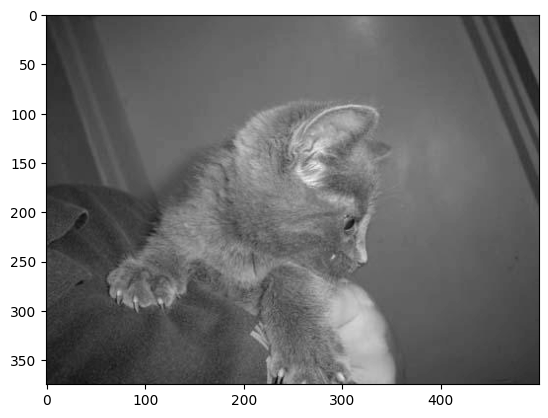

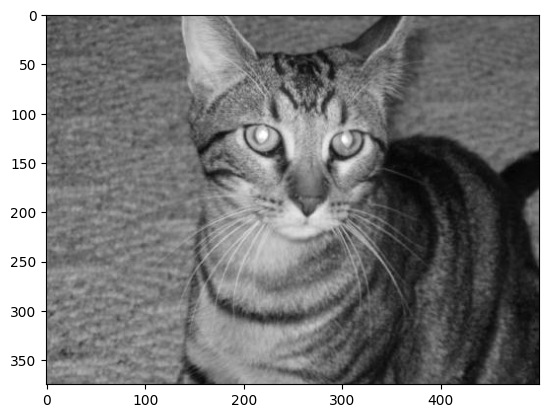

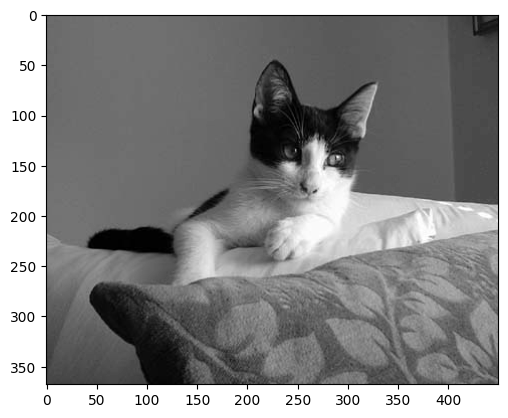

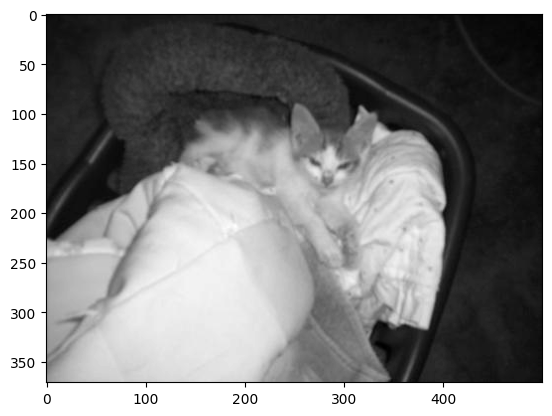

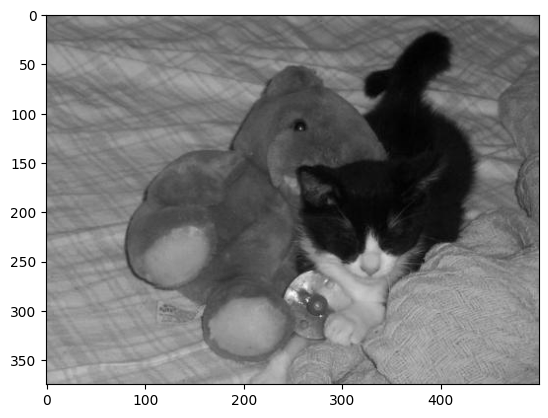

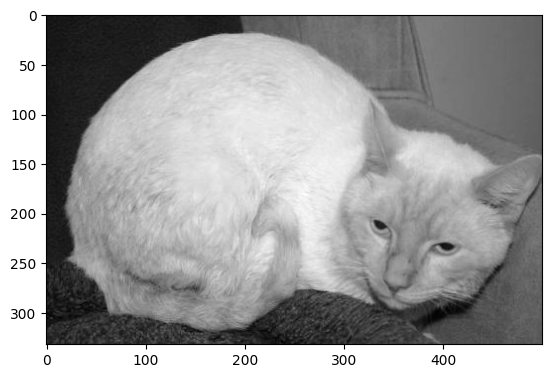

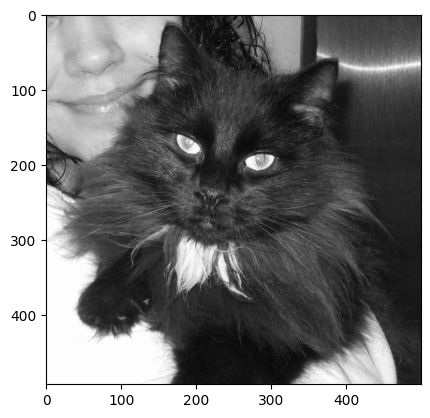

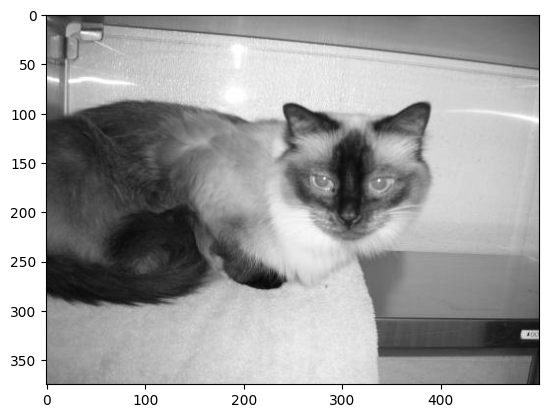

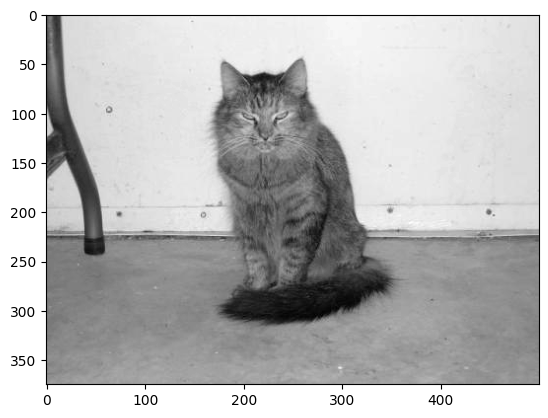

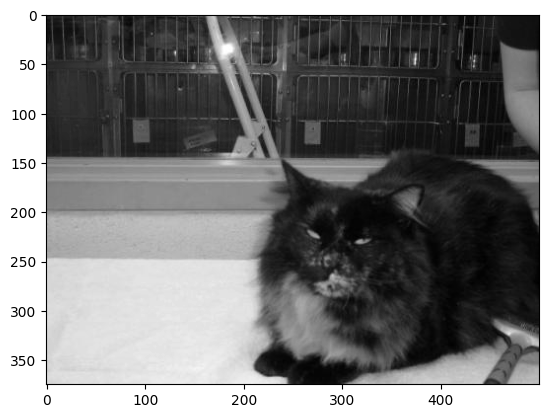

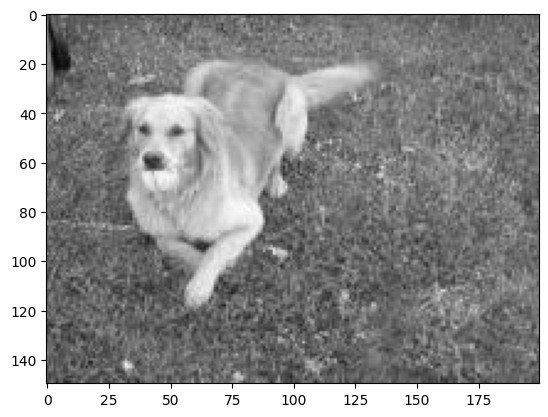

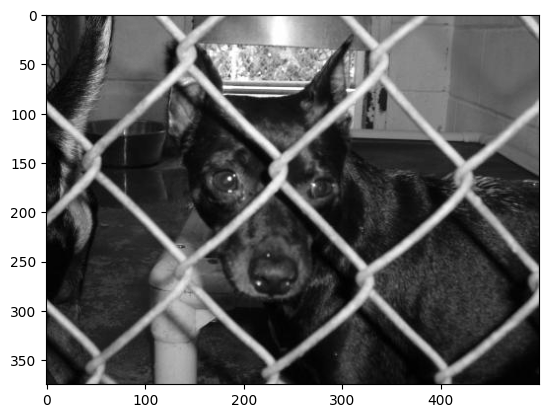

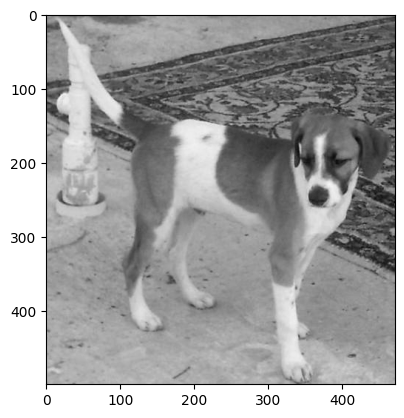

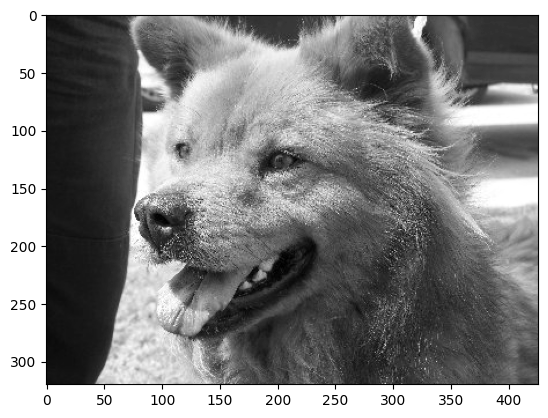

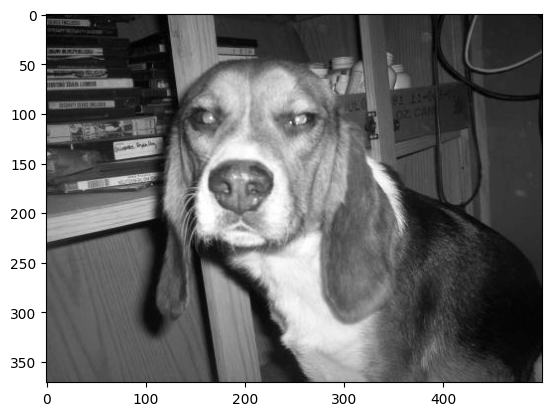

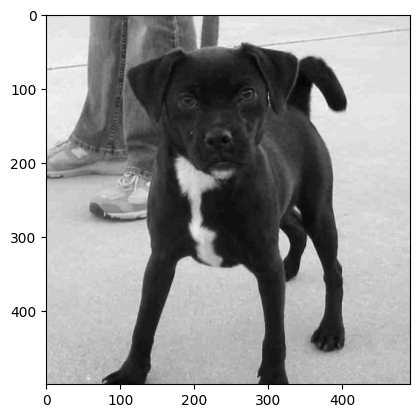

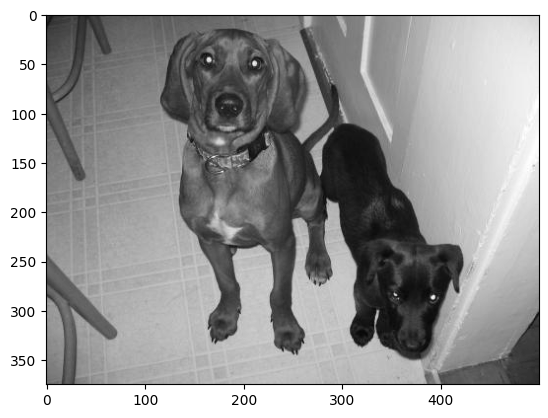

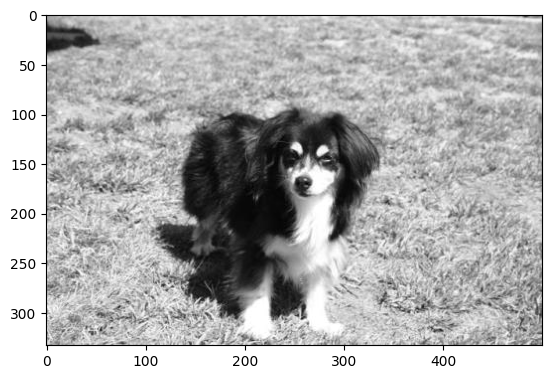

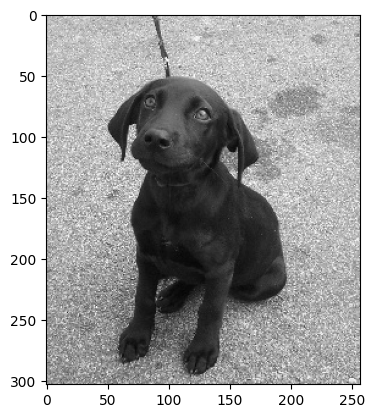

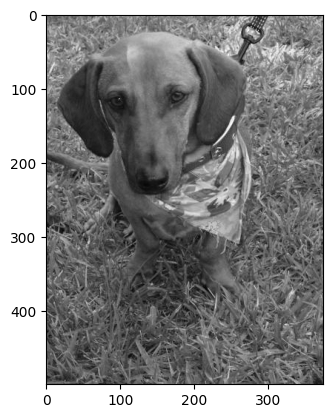

In [2]:
DATADIR = '/kaggle/input/petimages/PetImages'
CATEGORIES = ['cat', 'dog']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    x = 0
    for img in os.listdir(path):
        x += 1
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        if x == 10:
            break


In [3]:
print(img_array)
print(img_array.shape)

[[ 92 110 136 ... 115 129 130]
 [102 113 126 ... 125 142 147]
 [101 110 113 ... 150 162 163]
 ...
 [106 108 111 ...  58  77  83]
 [113 115 116 ...  49  66  76]
 [115 116 115 ...  44  61  75]]
(500, 375)


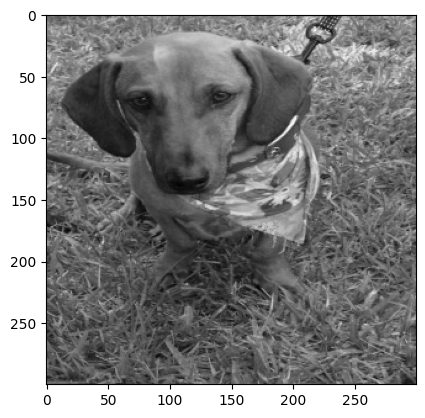

In [4]:
new_arr = cv2.resize(img_array, (300, 300))
plt.imshow(new_arr, cmap = 'gray')
plt.show()

In [5]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (300, 300))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

100%|██████████| 500/500 [00:03<00:00, 148.37it/s]


In [6]:
print(training_data[0])

[array([[56, 60, 55, ..., 95, 94, 91],
       [51, 57, 55, ..., 96, 94, 93],
       [49, 56, 54, ..., 97, 96, 95],
       ...,
       [37, 45, 48, ..., 58, 58, 58],
       [43, 49, 48, ..., 58, 58, 58],
       [44, 46, 45, ..., 58, 58, 58]], dtype=uint8), 0]


In [7]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

0
0
0
1
0
1
0
1
0
0


In [8]:
x = []
y = []

for features,label in training_data:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1, 300, 300)
y = np.array(y)

In [9]:
import pickle

pickle_out = open('x.pickle', 'wb')
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open('x.pickle', 'rb')
x = pickle.load(pickle_in)

pickle_in = open('y.pickle', 'rb')
y = pickle.load(pickle_in)

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (300, 300)),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(2, activation = 'softmax')
    
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = (['accuracy']))

In [12]:
model.fit(x, y, epochs = 15)

Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 509ms/step - accuracy: 0.5106 - loss: 1621.7133
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 531ms/step - accuracy: 0.5000 - loss: 176.1309
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 512ms/step - accuracy: 0.5420 - loss: 111.3310
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 532ms/step - accuracy: 0.4950 - loss: 56.6451
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 509ms/step - accuracy: 0.4789 - loss: 14.5539
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 528ms/step - accuracy: 0.5358 - loss: 13.6181
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 513ms/step - accuracy: 0.5400 - loss: 4.2849
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 514ms/step - accuracy: 0.5453 - loss: 3.0162
Epoch 9/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 526ms/step - accuracy: 0.5169 - loss: 4.0937
Epoch 10/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 512ms/step - accuracy: 0.4850 - loss: 5.9340
Epoch 11/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 526ms/step - accuracy: 0.4948 - loss: 6.0311
Epoch 12/15
32/32 ━━━━━━━━━━━━━

In [13]:
test_loss, test_acc = model.evaluate(x, y)
print('test_acc', test_acc,'\n')
print('test_loss', test_loss,'\n')

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6207 - loss: 0.7126
test_acc 0.6276276111602783 

test_loss 0.7179323434829712 

